In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")


In [51]:
df = pd.read_csv(r"C:\Users\devli\Downloads\framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [53]:
df.shape

(4238, 16)

In [54]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [55]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'male'),
  Text(1, 0, 'age'),
  Text(2, 0, 'education'),
  Text(3, 0, 'currentSmoker'),
  Text(4, 0, 'cigsPerDay'),
  Text(5, 0, 'BPMeds'),
  Text(6, 0, 'prevalentStroke'),
  Text(7, 0, 'prevalentHyp'),
  Text(8, 0, 'diabetes'),
  Text(9, 0, 'totChol'),
  Text(10, 0, 'sysBP'),
  Text(11, 0, 'diaBP'),
  Text(12, 0, 'BMI'),
  Text(13, 0, 'heartRate'),
  Text(14, 0, 'glucose'),
  Text(15, 0, 'TenYearCHD')])

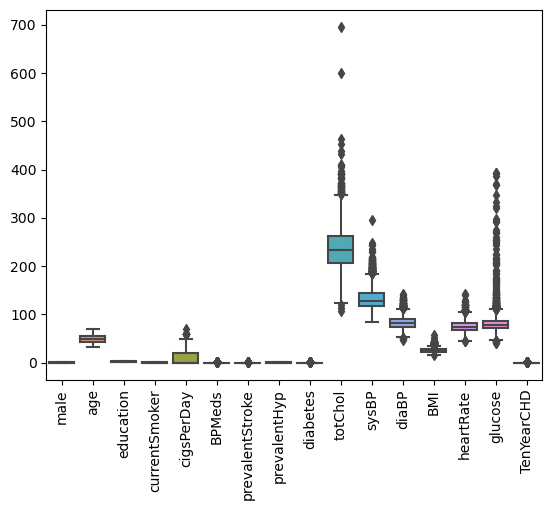

In [56]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [57]:
for i in df:
    if df[i].dtypes in ("float64","int64"):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(lower=ll,upper=ul,inplace=True)


In [64]:
df.heartRate.value_counts(normalize=True)

heartRate
75.0     0.132877
80.0     0.090866
70.0     0.071985
60.0     0.054520
85.0     0.053576
           ...   
47.0     0.000236
97.0     0.000236
99.0     0.000236
101.0    0.000236
46.0     0.000236
Name: proportion, Length: 61, dtype: float64

In [60]:
df.heartRate.value_counts(normalize=True)

heartRate
75.0     0.132877
80.0     0.090866
70.0     0.071985
60.0     0.054520
85.0     0.053576
           ...   
47.0     0.000236
97.0     0.000236
99.0     0.000236
101.0    0.000236
46.0     0.000236
Name: proportion, Length: 61, dtype: float64

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [41]:
Quantitative_variables = df.select_dtypes(include=[np.number])
Quantitative_variables.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1


In [42]:
Qualitative_varibles = df.select_dtypes(include=['object'])
Qualitative_varibles.head(5)

""
0
1
2
3
4


In [43]:
from sklearn.preprocessing import LabelEncoder

Qualitative_varibles = Qualitative_varibles.apply(LabelEncoder().fit_transform)
Qualitative_varibles.head(5)

Series([], dtype: float64)

In [44]:
data = pd.concat([Quantitative_variables,Qualitative_varibles],axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,0
0,63,1,3,145,233.0,0,0,150.0,0,2.3,0,0.0,1.0,1,NaN
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1,NaN
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1,NaN
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1,NaN
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1,NaN


In [45]:
x = data.drop('ca',axis=1)
y = data[['ca']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [46]:
train = pd.concat([x_train,y_train],axis=1)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target,0,ca
168,63,1,0,130,254.0,0,0,147.0,0,1.4,1,3.0,0,NaN,1.0
66,51,1,2,100,222.0,0,1,143.0,1,1.2,1,2.0,1,NaN,0.0
148,44,1,2,120,226.0,0,1,169.0,0,0.0,2,2.0,1,NaN,0.0
290,61,1,0,148,203.0,0,1,161.0,0,0.0,2,3.0,0,NaN,1.0
222,65,1,3,138,282.0,0,0,174.0,0,1.4,1,2.0,0,NaN,1.0


In [47]:
x_train.shape

(242, 14)

In [48]:
y_train.shape

(242, 1)